In [ ]:
[XOR 문제 - 단층 퍼셉트론 구현하기]

In [6]:
import torch
import torch.nn as nn

device = 'cpu'
torch.manual_seed(777)

In [4]:
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

In [12]:
linear = nn.Linear(2, 1, bias = True)
sigmoid = nn.Sigmoid()
model = nn.Sequential(linear, sigmoid).to(device)
print(list(linear.parameters()))
print(list(model.parameters()))

[Parameter containing:
tensor([[0.3171, 0.0046]], requires_grad=True), Parameter containing:
tensor([0.4594], requires_grad=True)]
[Parameter containing:
tensor([[0.3171, 0.0046]], requires_grad=True), Parameter containing:
tensor([0.4594], requires_grad=True)]


In [10]:
criterion = nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr = 1)

In [14]:
for step in range(10001):
    optimizer.zero_grad()
    hypothesis = model(X)
    
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()
    
    if step % 100 == 0:
        print(step, cost.item())

0 0.7433513402938843
100 0.7433513402938843
200 0.7433513402938843
300 0.7433513402938843
400 0.7433513402938843
500 0.7433513402938843
600 0.7433513402938843
700 0.7433513402938843
800 0.7433513402938843
900 0.7433513402938843
1000 0.7433513402938843
1100 0.7433513402938843
1200 0.7433513402938843
1300 0.7433513402938843
1400 0.7433513402938843
1500 0.7433513402938843
1600 0.7433513402938843
1700 0.7433513402938843
1800 0.7433513402938843
1900 0.7433513402938843
2000 0.7433513402938843
2100 0.7433513402938843
2200 0.7433513402938843
2300 0.7433513402938843
2400 0.7433513402938843
2500 0.7433513402938843
2600 0.7433513402938843
2700 0.7433513402938843
2800 0.7433513402938843
2900 0.7433513402938843
3000 0.7433513402938843
3100 0.7433513402938843
3200 0.7433513402938843
3300 0.7433513402938843
3400 0.7433513402938843
3500 0.7433513402938843
3600 0.7433513402938843
3700 0.7433513402938843
3800 0.7433513402938843
3900 0.7433513402938843
4000 0.7433513402938843
4100 0.7433513402938843
4200

In [15]:
with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean()
    print('모델의 출력값(Hypothesis): ', hypothesis.detach().cpu().numpy())
    print('모델의 예측값(Predicted): ', predicted.detach().cpu().numpy())
    print('실제값(Y): ', Y.cpu().numpy())
    print('정확도(Accuracy): ', accuracy.item())

모델의 출력값(Hypothesis):  [[0.61287934]
 [0.61397755]
 [0.6849394 ]
 [0.68593794]]
모델의 예측값(Predicted):  [[1.]
 [1.]
 [1.]
 [1.]]
실제값(Y):  [[0.]
 [1.]
 [1.]
 [0.]]
정확도(Accuracy):  0.5


In [ ]:
[XOR 문제 - 다중 퍼셉트론 구현하기]

In [1]:
import torch
import torch.nn as nn

device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [2]:
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

In [3]:
model = nn.Sequential(
    nn.Linear(2, 10, bias = True),
    nn.Sigmoid(),
    nn.Linear(10, 10, bias = True),
    nn.Sigmoid(),
    nn.Linear(10, 10, bias = True),
    nn.Sigmoid(),
    nn.Linear(10, 1, bias = True),
    nn.Sigmoid()
    ).to(device)

In [4]:
print(list(model.parameters()))

[Parameter containing:
tensor([[-0.5913, -0.0125],
        [-0.1368, -0.1613],
        [ 0.5393,  0.5390],
        [ 0.3171,  0.0046],
        [ 0.4594, -0.3346],
        [-0.2669,  0.1340],
        [-0.5527,  0.1716],
        [ 0.3324,  0.6927],
        [ 0.5890, -0.2480],
        [ 0.5254,  0.5479]], requires_grad=True), Parameter containing:
tensor([ 0.5707, -0.3955, -0.1420, -0.3777,  0.6238,  0.5911,  0.5589, -0.0933,
        -0.4917, -0.2611], requires_grad=True), Parameter containing:
tensor([[-0.0777,  0.0738,  0.0224,  0.3143, -0.0773,  0.2872,  0.2076,  0.0923,
          0.0344, -0.0821],
        [-0.2722, -0.0715,  0.1450,  0.2572, -0.3125, -0.3003, -0.0319, -0.1804,
         -0.0675,  0.0084],
        [ 0.3156, -0.2212, -0.1146,  0.2555,  0.1888,  0.2235, -0.2769,  0.0965,
          0.3159,  0.0272],
        [ 0.1234, -0.2545, -0.1167, -0.2079,  0.1486,  0.2773,  0.1240, -0.2649,
         -0.0943,  0.0560],
        [-0.0586, -0.1496, -0.2094, -0.2899, -0.0971,  0.2965, -0.2

In [6]:
criterion = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr = 1)

In [7]:
for epoch in range(10001):
    optimizer.zero_grad()
    
    hypothesis = model(X)
    
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print(epoch, cost.item())

0 0.6948983669281006
100 0.693155825138092
200 0.6931535601615906
300 0.6931513547897339
400 0.6931493282318115
500 0.6931473016738892
600 0.6931453943252563
700 0.6931434273719788
800 0.6931416988372803
900 0.6931397914886475
1000 0.6931380033493042
1100 0.6931361556053162
1200 0.6931343078613281
1300 0.6931324005126953
1400 0.6931304931640625
1500 0.6931284666061401
1600 0.6931264400482178
1700 0.6931242942810059
1800 0.6931220889091492
1900 0.6931197047233582
2000 0.6931172013282776
2100 0.6931145191192627
2200 0.6931115984916687
2300 0.6931084394454956
2400 0.6931051015853882
2500 0.6931014657020569
2600 0.6930974721908569
2700 0.6930930018424988
2800 0.6930879950523376
2900 0.6930825114250183
3000 0.6930763721466064
3100 0.6930692791938782
3200 0.6930612325668335
3300 0.6930519342422485
3400 0.6930410861968994
3500 0.6930283904075623
3600 0.6930132508277893
3700 0.6929951310157776
3800 0.6929728984832764
3900 0.6929452419281006
4000 0.6929103136062622
4100 0.6928649544715881
4200 

In [10]:
with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean()
    print('모델의 출력값(Hypothesis): ', hypothesis.detach().cpu().numpy())
    print('모델의 예측값(Predicted): ', predicted.detach().cpu().numpy())
    print('실제값(Y): ', Y.cpu().numpy())
    print('정확도(Accuracy): ', accuracy.item())

모델의 출력값(Hypothesis):  [[1.1176888e-04]
 [9.9982870e-01]
 [9.9984217e-01]
 [1.8543568e-04]]
모델의 예측값(Predicted):  [[0.]
 [1.]
 [1.]
 [0.]]
실제값(Y):  [[0.]
 [1.]
 [1.]
 [0.]]
정확도(Accuracy):  1.0


In [ ]:
[비선형 활성화 함수]

In [11]:
import numpy as np
import matplotlib.pyplot as plt

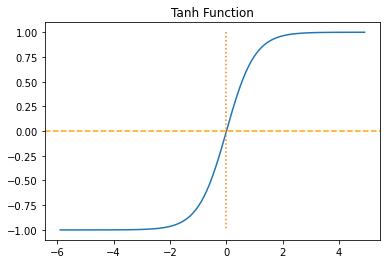

In [13]:
x = np.arange(-5.9, 5.0, 0.1)
y = np.tanh(x)

plt.plot(x, y)
plt.plot([0, 0], [1.0, -1.0], ':')
plt.axhline(y = 0, color = 'orange', linestyle = '--')
plt.title('Tanh Function')
plt.show()

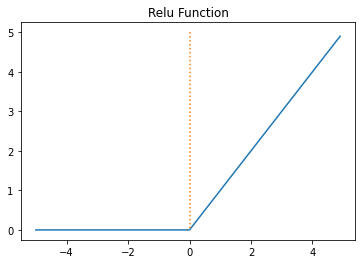

In [14]:
def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x, y)
plt.plot([0, 0], [5.0, 0.0], ':')
plt.title('Relu Function')
plt.show()

In [15]:
a = 0.1

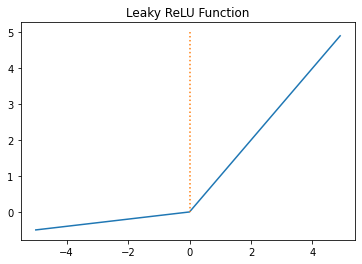

In [31]:
def leaky_relu(x):
    return np.maximum(a*x, x)

x = np.arange(-5.0, 5.0, 0.1)
y = leaky_relu(x)

plt.plot(x, y)
plt.plot([0, 0], [5, 0], ':')
plt.title('Leaky ReLU Function')
plt.show()

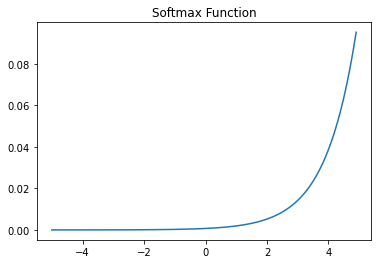

In [32]:
x = np.arange(-5.0, 5.0, 0.1)
y = np.exp(x) / np.sum(np.exp(x))

plt.plot(x, y)
plt.title('Softmax Function')
plt.show()

In [ ]:
[다층 퍼셉트론으로 손글씨 분류하기]

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()

In [3]:
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [4]:
print(digits.target[0])

0


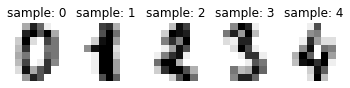

In [5]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:5]):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap = plt.cm.gray_r, interpolation = 'nearest')
    plt.title('sample: %i' % label)

In [6]:
for i in range(5):
    print(i, '번 인덱스 샘플의 레이블 : ', digits.target[i])

0 번 인덱스 샘플의 레이블 :  0
1 번 인덱스 샘플의 레이블 :  1
2 번 인덱스 샘플의 레이블 :  2
3 번 인덱스 샘플의 레이블 :  3
4 번 인덱스 샘플의 레이블 :  4


In [7]:
print(digits.data[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [8]:
X = digits.data
Y = digits.target

In [9]:
import torch
import torch.nn as nn
from torch import optim
import random
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [10]:
model = nn.Sequential(
nn.Linear(64, 32),
nn.ReLU(),
nn.Linear(32, 16),
nn.ReLU(),
nn.Linear(16, 10)
)

In [11]:
X = torch.tensor(X, dtype = torch.float32)
Y = torch.tensor(Y, dtype = torch.int64)


In [12]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

In [13]:
losses = []

In [14]:
for epoch in range(101):
    optimizer.zero_grad()
    y_pred = model(X)
    loss = loss_fn(y_pred, Y)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, 100, loss.item()
        ))
        
    losses.append(loss.item())

Epoch    0/100 Cost: 2.341964
Epoch   10/100 Cost: 1.925906
Epoch   20/100 Cost: 1.521241
Epoch   30/100 Cost: 1.121188
Epoch   40/100 Cost: 0.784717
Epoch   50/100 Cost: 0.545170
Epoch   60/100 Cost: 0.388512
Epoch   70/100 Cost: 0.289512
Epoch   80/100 Cost: 0.226974
Epoch   90/100 Cost: 0.186258
Epoch  100/100 Cost: 0.157861


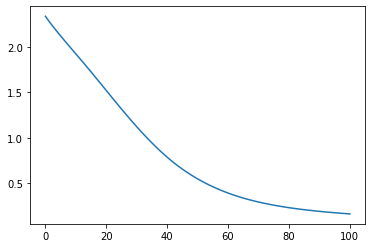

In [15]:
plt.plot(losses)

<ipython-input-29-a649c77029dd>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X, dtype = torch.float32)
<ipython-input-29-a649c77029dd>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y = torch.tensor(Y, dtype = torch.int64)


Accuracy:  0.9654980301856995
Label:  9
Prediction:  9


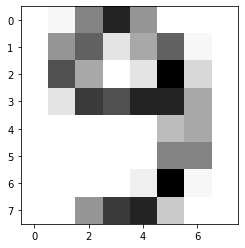

In [29]:
with torch.no_grad():
    X = torch.tensor(X, dtype = torch.float32)
    Y = torch.tensor(Y, dtype = torch.int64)
    
    hypothesis = model(X)
    prediction = torch.argmax(hypothesis, 1)
    correct_prediction = prediction == Y
    accuracy = correct_prediction.float().mean()
    print('Accuracy: ', accuracy.item())
    
    r = random.randint(0, X.shape[0]-1)
    X_single_data = X[r][:].float().to(device)
    Y_single_data = Y[r].to(device)
    
    print('Label: ', Y_single_data.item())
    single_prediction = model(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, dim = 0).item())
    
    plt.imshow(X_single_data.view(8, 8), cmap = 'Greys', interpolation = 'nearest')
    plt.show()

In [17]:
print(X.shape)
print(Y.shape)
print(hypothesis)
print(prediction)
print(X_single_data)
print(single_prediction)

torch.Size([1797, 64])
torch.Size([1797])
tensor([[ 8.5181, -6.0443, -4.2732,  ...,  1.3292,  0.5282,  2.5348],
        [-6.6563,  7.7937, -1.7499,  ..., -3.9941,  2.0828, -1.2293],
        [-5.3279,  2.2800,  3.0858,  ..., -5.4325,  1.4926, -4.9701],
        ...,
        [-3.1015,  3.0272, -1.4565,  ..., -4.6986,  6.7664, -2.6426],
        [ 1.1141,  0.0477, -4.6477,  ...,  0.4866,  3.1492,  6.5520],
        [-2.1070,  0.4655, -0.4670,  ..., -4.9961,  5.5752, -0.1326]])
tensor([0, 1, 2,  ..., 8, 9, 8])
tensor([ 0.,  0.,  0.,  3., 13.,  1.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  3.,
         0.,  0.,  0.,  0.,  1., 15., 16.,  4.,  0.,  0.,  0.,  0.,  8., 16.,
        16.,  1.,  0.,  0.,  0.,  2., 16., 14., 16.,  5.,  1.,  0.,  0., 11.,
        16., 16., 16., 16., 10.,  0.,  0.,  5.,  8., 11., 16.,  4.,  1.,  0.,
         0.,  0.,  0.,  2., 16.,  2.,  0.,  0.])
tensor([-3.8176,  2.8965, -4.7535, -1.0428,  4.8033, -5.7595,  0.8570, -1.3176,
         2.7989, -3.8419])
